<div style="padding: 10px 20px; background-color: #FFFFFF; text-align: center;">
    <img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" 
         width=400 
         style="margin: 5px auto !important;">
    <h1 align=center>Hacktiv8 PTP Introduction to Data Science Projects 1</h1>
    <h3 align=center>Analisis Kriminalitas Wilayah Administrasi London Raya (Januari 2008 s/d Desember 2016)</h3>
</div>

## Pendahuluan

### Deskripsi Permasalahan

Wilayah administrasi London Raya terdiri dari 33 sektor (borough), dimana setiap sektor memiliki pemerintahannya sendiri. Tujuan dari analisis ini adalah untuk mengetahui tindak kriminalitas yang terjadi di Wilayah administrasi London Raya dan setiap sektornya pada rentang bulan Januari 2008 hingga Desember 2016. Dataset yang menjadi dasar analisis memiliki beberapa atribut data yaitu sebagai berikut:

* `lsoa_code`: kode area administrasi dan demografis
* `borough`: sektor dari Wilayah administrasi London Raya
* `major_category`: kategori kriminalitas mayor
* `minor_category`: kategori kriminalitas minor
* `value`: jumlah kejadian tindak kriminalitas sesuai dengan sektor dan waktu (bulan dan tahun)
* `year`: tahun pendataan
* `month`: bulan pendataan

Analisis yang dilakukan didasarkan oleh data dan memiliki tujuan utama untuk menurunkan beberapa kesimpulan yang terlihat dari data keseluruhan dan juga melihat pola atau kejadian menarik yang teramati dalam data,

## Data Overview

### Import Pustaka

In [49]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

### Persiapan Data

In [13]:
df = pd.read_csv('datasets/london_crime_by_lsoa.csv')

### Preprocessing

#### Cuplikan Data

In [23]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


- Line chart : trend total kriminalitas dari tahun ke tahun, trend total kriminalitas dari bulan ke bulan, trend data total kriminalitas dari tahun ke tahun berdasarkan major categorynya, trend data total kriminalitas dari bulan ke bulan berdasarkan major categorynya, dan dari tahun ke tahun berdasarkan discrictnya
- Area chart : stacked areachart untuk menunjukkan major category yang paling dominan dan perkembangannya, dan juga buat berdasarkan district nya
- Histogram, sumbu xnya jumlah kriminal, sumbu y nya banyaknya distric

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Cek Missing Values

In [16]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

#### Eksplorasi dan Pengenalan Tiap Kolom

In [17]:
for column in df.columns:
    unique_value = df[column].unique()
    unique_value_percentage = len(unique_value)*100/df.shape[0]
    
    print(column)
    print("=> Amount unique values \t: ", len(unique_value))
    print("=> Percentage unique values \t: ", "< 0.1 %"  if unique_value_percentage < 0.1 else "{:.2f}".format(unique_value_percentage))
    print("=> Overview values")
    print(unique_value[:5])
    print()

lsoa_code
=> Amount unique values 	:  4835
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['E01001116' 'E01001646' 'E01000677' 'E01003774' 'E01004563']

borough
=> Amount unique values 	:  33
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth']

major_category
=> Amount unique values 	:  9
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage']

minor_category
=> Amount unique values 	:  32
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon']

value
=> Amount unique values 	:  247
=> Percentage unique values 	:  < 0.1 %
=> Overview values
[0 1 2 3 4]

year
=> Amount unique values 	:  9
=> Percentage unique values 	:  < 0.1 %
=> Overview values
[2016 2015 2008 2012 2010]

month
=> Amount unique values 	:  12
=

Berdasarkan informasi di atas, ditemukan bahwa pada data tidak terdapat missing values ataupun values yang mencurigakan. Dapat dilihat juga bahwa values dari setiap atribut terbatas variasinya.

#### Penambahan Kolom Turunan

In [50]:
df['periode'] = df.apply(lambda row: str(row.year) + "-" + (str(row.month) if row.month >= 10 else "0" + str(row.month)), axis = 1)

In [51]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month,periode
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05


#### Pengurangan Ukuran Data Vertikal
Dikarenakan jumlah data yang mencapai 13,5 juta baris, diperlukan waktu yang cukup lama untuk melakukan pemrosesan dan visualisasi. Setelah melihat overview data, diamati bahwa salah satu elemen yang membuat jumlah data membengkak adalah detail informasi lsoa_code. Terdapat 4835 lsoa_code yang tersebar dalam 33 borough, artinya rata-rata setiap borough memiliki 147 lsoa_code. Untuk itu, dibuat dataframe baru yang melakukan agregasi detail wilayah hingga tingkat borough. Perubahan ini dapat mereduksi jumlah data menjadi kurang dari 1% dari sebelumnya.

In [65]:
df_reduced = df.groupby(['borough', 'major_category', 'minor_category', 'year', 'month', 'periode'])[['value']].sum().reset_index() 

In [66]:
df_reduced

,borough,major_category,minor_category,year,month,periode,value
0,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,1,2008-01,55
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,2,2008-02,65
2,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,3,2008-03,55
3,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,4,2008-04,53
4,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,5,2008-05,55
...,...,...,...,...,...,...,...
112963,Westminster,Violence Against the Person,Wounding/GBH,2016,8,2016-08,99
112964,Westminster,Violence Against the Person,Wounding/GBH,2016,9,2016-09,105
112965,Westminster,Violence Against the Person,Wounding/GBH,2016,10,2016-10,105
112966,Westminster,Violence Against the Person,Wounding/GBH,2016,11,2016-11,96


Reduksi baris berhasil menurunkan jumlah baris menjadi 113 ribu, sehingga kurang dari 1% dibanding data detail.  

## Exploratory Data Analysis

### Preparing Visualization Tools

In [52]:
%matplotlib inline 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



In [53]:
mpl.style.use(['ggplot'])

### Trend dan Pertumbuhan Angka Kriminalitas

#### Trend Jumlah Kriminalitas Tahunan Se-Wilayah Administrasi London

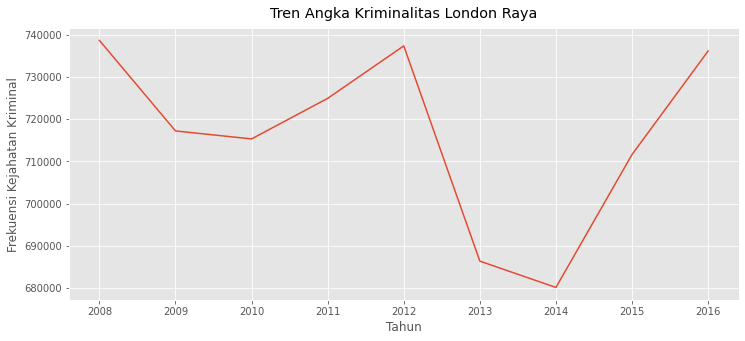

In [69]:
plt.figure(figsize=(12, 5))

df_reduced.groupby(['year'])['value'].sum().plot(kind='line')

plt.title('Tren Angka Kriminalitas London Raya', pad=10)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa banyaknya tindakan kriminal yang terjadi di London Raya dari tahun ke tahun terbilang fluktuatif. Fluktiasi yang terjadi tidak terlalu besar secara presentase karena selama 9 tahun dari tahun 2008 sampai tahun 2016, angka kejadian kriminal terdapat pada rentang 680.000 hingga 740.000 kejadian. Namun, karena yang menjadi bahan analisis adalah tindak kriminalitas, penambahan dan pengurangan yang terjadi tetap sangat berarti.

Berdasarkan pengamatan terhadap kenaikan dan penurunan angka kejadian, sebenarnya teramati bahwa setiap dua tahun sekali, tren kejadian berubah.
- Pada tahun 2009 dan 2010, angka kejadian menurun, diawali penurunan tajam pada tahun 2009 dan diikuti penurunan landai pada tahun 2010. 
- Pada tahun 2011 dan 2012, angka kejadian naik dengan perubahan (kemiringan garis) yang cukup signifikan.
- Pada tahun 2013 dan 2014, angka kejadian menurun, diawali penurunan tajam pada tahun 2013 dan diikuti penurunan lebih landai pada tahun 2014. Hal ini mirip dengan pola pada tahun 2009 dan 2010.
- Pada tahun 2015 dan 2016, angka kejadian naik dengan perubahan (kemiringan garis) yang signifikan.

Namun pola yang diamati masih dalam rentang waktu yang sangat sedikit, oleh karena itu besar kemungkinan merupakan hal yang kebetulan. Diperlukan data yang lebih luas untuk lebih meyakinkan.

#### Trend Jumlah Kriminalitas Bulanan Se-Wilayah Administrasi London

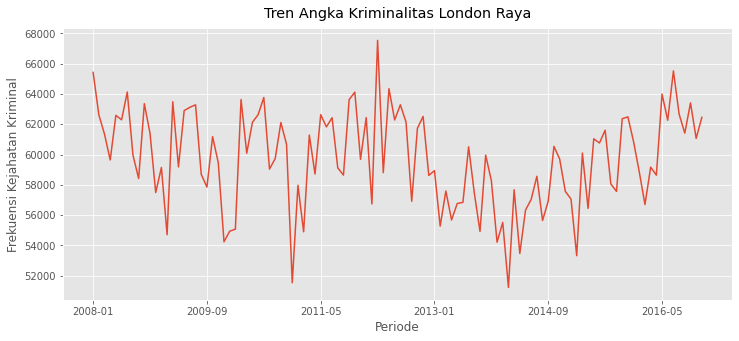

In [72]:
plt.figure(figsize=(12, 5))

df_reduced.sort_values(by=['periode']).groupby(['periode'])['value'].sum().plot(kind='line');

plt.title('Tren Angka Kriminalitas London Raya', pad=10)
plt.xlabel('Periode')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa banyaknya tindakan kriminal yang terjadi di London Raya dari tiap periodenya termasuk cukup fluktuatif (dalam satuan terkecil bulan).Tercatat jumlah kejadian tertinggi dalam satu bulan mencapai hampir 68.000 kasus, sedangkan paling rendah sekitar 51.000 kasus. Dikarenakan fluktuasi yang cukup tinggi, tidak terlihat pola yang terdapat pada grafik tren jumlah kejadian ini.

#### Trend Jumlah Kriminalitas Bulanan Se-Wilayah Administrasi London

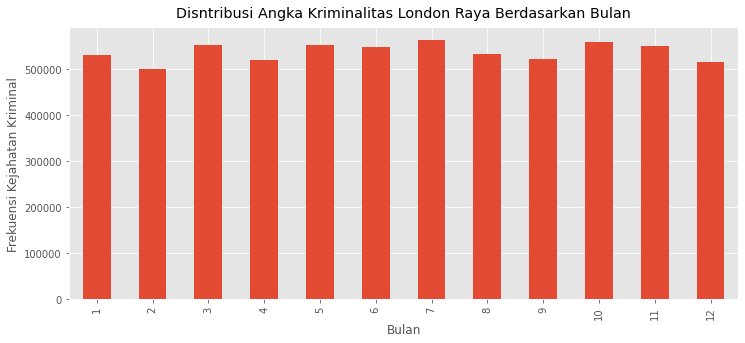

In [75]:
plt.figure(figsize=(12, 5))

df_reduced.groupby(['month'])['value'].sum().plot(kind='bar');

plt.title('Disntribusi Angka Kriminalitas London Raya Berdasarkan Bulan', pad=10)
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

In [22]:
df['year']

0           2016
1           2016
2           2015
3           2016
4           2008
            ... 
13490599    2015
13490600    2015
13490601    2011
13490602    2011
13490603    2015
Name: year, Length: 13490604, dtype: int64